In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd


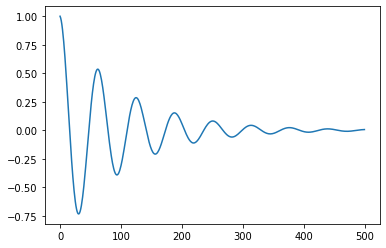

In [20]:
# define a damped harmonic oscillator, with a single oscillation, and plot it
def damped_harmonic_oscillator(t, omega, alpha):
    return np.exp(-alpha * t) * np.cos(omega * t)

wave = damped_harmonic_oscillator(np.arange(0, 50, 0.1), 1, 0.1)

plt.plot(wave)


In [21]:
wave.shape

(500,)

In [83]:
# define 1000 waves with random omega and alpha values
omega = list(np.random.uniform(1, 10, 1000))
alpha = list(np.random.uniform(0, 1, 1000))

random_waves = [damped_harmonic_oscillator(np.arange(0, 50, 0.1), o, a) for o, a in zip(omega, alpha)]

In [84]:
random_waves = np.array(random_waves)

In [85]:
random_waves.shape

(1000, 500)

In [86]:
# do SVD on the random waves
U, s, V = svd(random_waves, full_matrices=False)


In [87]:
# make a random wave, and project it to the first two principal components
test_wave = damped_harmonic_oscillator(np.arange(0, 50, 0.1), 1, 0.1)
# project the test wave onto the first two principal components
projected_wave = np.dot(test_wave, V.T[:, :2])


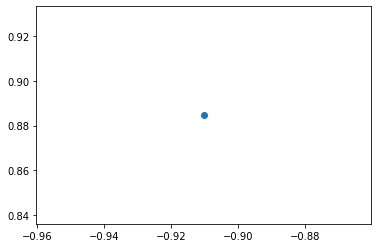

In [88]:
# plot the projected wave
plt.scatter(projected_wave[0], projected_wave[1])

In [89]:
projected_waves = [np.dot(damped_harmonic_oscillator(np.arange(0, 50, 0.1), o, a), V.T[:, :2]) for o, a in zip(omega, alpha)]
projected_waves = np.array(projected_waves)

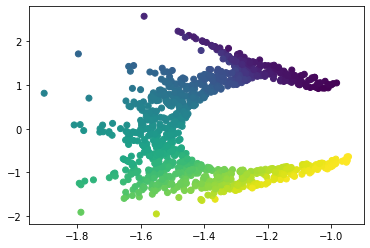

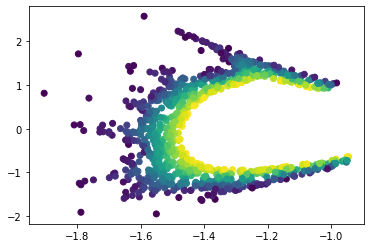

In [90]:
# scatter plot the random_waves projected onto the first two principal components and color them according to their omega
plt.scatter(projected_waves[:, 0], projected_waves[:, 1], c=omega, cmap='viridis')
# scatter plot the random_waves projected onto the first two principal components and color them according to their alpha
plt.show()
plt.scatter(projected_waves[:, 0], projected_waves[:, 1], c=alpha, cmap='viridis')
plt.show()

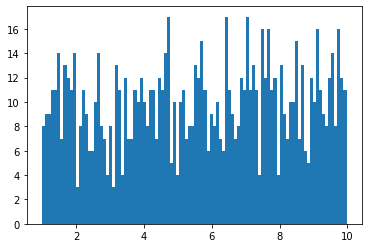

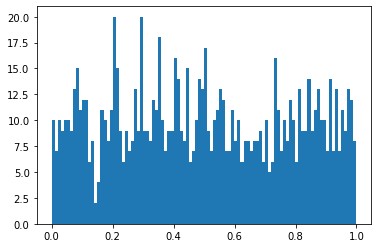

In [91]:
# plot all the omega values
plt.hist(omega, bins=100)
plt.show()

# plot all the alpha values
plt.hist(alpha, bins=100)
plt.show()

